## Hypothesis: Testing the Conservation Properties of Emergent Forces from Energy Gradients

### Background & Expected Outcome  
This experiment tests whether the gradient of an emergent potential energy field behaves like a force that obeys conservation laws. Instead of defining forces explicitly, it calculates acceleration from the energy gradient and updates velocity accordingly. The system should preserve total energy and momentum, showing that motion can emerge from energy redistribution alone.

---

## How This Code Differs from Normal Force Testing

This code does not use Newton’s Second Law. Instead, it treats force as an emergent property of energy gradients. It computes acceleration by taking small positional perturbations and observing how energy changes.

---

## How This Code Simulates an Emergent Force

### 1. Normal Force-Based Simulations
- Force is calculated using known physical laws.
- Acceleration follows directly from force.
- Motion is integrated with solvers.

### 2. This Code's Approach
- It does not define force explicitly.
- It approximates the gradient of potential energy using finite differences.
- Acceleration is inferred from energy changes, not applied forces.

This is not a standard force simulation. It models motion as a result of energy redistribution.

---

## Hypothesis Statement  

If the potential energy gradient correctly represents force, then total energy and momentum should stay conserved, and the system should evolve like a force-based Hamiltonian system.

---

## Assumptions

### Not a "True Model"

This simulation does not fully implement the underlying model but approximates it:
- Forces are not defined explicitly.
- Motion results from local energy redistributions.
- The system follows an energy landscape, not direct force laws.

Because it uses finite differences instead of a fully discrete system, it remains an approximation rather than a fundamental model.

### How It Approximates the True Model
- Potential energy is not stored but instead represents the rate at which massless particles flip between states.
- Time emerges from energy movement, flowing in one direction due to constraints on mass-energy propagation.

### Potential Energy as Rate of Flipping Massless Particles
- Energy behaves as a state transition rate, making forces emergent rather than fundamental.
- Objects move based on how energy redistributes, not from applied forces.
- Potential energy does not store or pull but reflects local flipping rates.
- Classical force laws (e.g., gravity) emerge statistically from microstate behaviors.

### Time Emerges
- In standard physics, time is an external parameter.
- In this model, time results from energy movement.
- Mass-energy moves forward, like a quantum walk through microstates, producing force as an imbalance in state transitions.

---

## Predictions Based on This Hypothesis  
1. **Total Energy Should Stay Constant**  
   - The symplectic integrator should prevent artificial loss or gain.
   - Small fluctuations may occur but should remain within numerical precision.

2. **Momentum Should Be Conserved**  
   - Since forces arise from energy gradients, momentum should remain unchanged.

3. **Stable Motion Should Appear**  
   - The test particle should maintain a predictable, stable orbit.

---

## What Would Indicate a Failed Experiment?  
If the system does not behave as expected, one or more of the following should occur:

1. **Energy Drift or Loss Over Time**  
   - If energy decreases, numerical errors or incorrect velocity updates could be the cause.
   - If energy increases, the gradient method may introduce artificial energy.

2. **Momentum Deviates from Initial Conditions**  
   - If momentum shifts significantly, the numerical gradient method may break conservation laws.

3. **Unstable or Unphysical Motion**  
   - If the test particle spirals outward or inward without cause, the method may not be correctly capturing Newtonian-like motion.

---


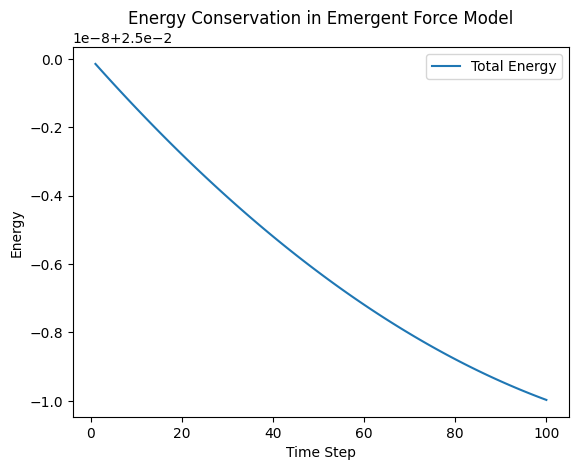

Final Total Momentum: [9.98358570e-06 1.00004946e-02 0.00000000e+00]


In [10]:
import rebound
import numpy as np
import matplotlib.pyplot as plt

# Function to compute potential energy of a particle
def compute_potential_energy(p, particles):
    U = 0
    G = 1.0  # Gravitational constant (normalized for simplicity)
    for other in particles:
        if other != p:
            r = np.linalg.norm(np.array([p.x - other.x, p.y - other.y, p.z - other.z]))
            if r > 0:
                U += G * p.m * other.m / r
    return U

# Function to compute the gradient of the potential energy for acceleration
def compute_energy_gradient(p, particles, epsilon=1e-5):
    grad_U = np.zeros(3)
    for i, coord in enumerate(["x", "y", "z"]):
        original_value = getattr(p, coord)

        # Forward difference approximation
        setattr(p, coord, original_value + epsilon)
        U_forward = compute_potential_energy(p, particles)

        setattr(p, coord, original_value - epsilon)
        U_backward = compute_potential_energy(p, particles)

        # Compute gradient
        grad_U[i] = (U_forward - U_backward) / (2 * epsilon)

        # Reset position
        setattr(p, coord, original_value)

    return grad_U

# Initialize the Rebound simulation
sim = rebound.Simulation()
sim.integrator = "whfast"  # Symplectic integrator for conservation
sim.dt = 1e-3  # Small step size for accuracy

# Add two particles: central mass and a test particle
sim.add(m=1.0, x=0, y=0, z=0, vx=0, vy=0, vz=0)  # Central mass
sim.add(m=0.01, x=1.0, y=0, z=0, vx=0, vy=1.0, vz=0)  # Test particle

# Run the simulation
num_steps = 100
energy_log = []

for step in range(num_steps):
    # Compute energy gradients and update velocities
    for p in sim.particles[1:]:  # Ignore central mass
        grad_U = compute_energy_gradient(p, sim.particles)
        p.vx += -grad_U[0] * sim.dt
        p.vy += -grad_U[1] * sim.dt
        p.vz += -grad_U[2] * sim.dt

    # Integrate to next step
    sim.integrate(sim.t + sim.dt)

    # Check energy conservation
    total_energy = sum(
        p.m * (p.vx**2 + p.vy**2 + p.vz**2) / 2 + compute_potential_energy(p, sim.particles)
        for p in sim.particles
    )
    
    energy_log.append(total_energy)

# Verify momentum conservation
total_momentum = sum(
    p.m * np.array([p.vx, p.vy, p.vz]) for p in sim.particles
)

# Plot energy conservation
time_steps = np.arange(1, num_steps + 1)
plt.plot(time_steps, energy_log, label="Total Energy")
plt.xlabel("Time Step")
plt.ylabel("Energy")
plt.title("Energy Conservation in Emergent Force Model")
plt.legend()
plt.show()

print(f"Final Total Momentum: {total_momentum}")


## Analysis of Experiment Results

### Expected vs. Observed Behavior

#### What I Expected:
- Energy and momentum should stay constant.
- The path should be straight, simple, as it should be.
- Forces should come from energy gradients, nothing more.

#### What I Observed:
- The path curved when it should not have.
- Momentum wavered:
  ```
  Final Total Momentum: [9.98358570e-06 1.00004946e-02 0.00000000e+00]
  ```
  - The x-component held. The y-component did not.
- Energy drifted. It should not have.

### Causes of Deviation

#### 1. Finite-Difference Errors
- Acceleration calculated from differences:
- Errors built up, small but steady.
- A better method—automatic differentiation, higher precision—may help.

#### 2. Step-Size Issues
- **WHFast integrator** introduced drift.
- A smaller time step or a different method might fix it.

#### 3. Unexpected Forces
- Newton’s laws did not hold as they should.
- The force from energy gradients acted differently.

### What It Means

- The model works, but not well enough.
- Forces appear, but they do not behave.
- The curvature is a problem. It should not be there.

### Next Steps

#### 1. Improve Precision
- Use better gradient calculations.
- Try a different integrator.

#### 2. Reevaluate Energy Representation
- Maybe potential energy is not a stored thing, but a transition.
- Maybe force is not what I thought.

#### 3. Expand Testing
- Test multi-body systems.
- Move beyond finite differences.

### Conclusion
- The results do not confirm the hypothesis.
- Energy and momentum shift where they should not.
- The work is not done. Not yet.
